In [1]:
import pandas as pd
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np

#df=pd.read_csv(r"C:/Career/Data Science/Capstone 1/UFC/raw_total_fight_data.csv",sep=';')
df=pd.read_csv(r'Capstone_1/raw_total_fight_data.csv',sep=';')
df['date']=[parse(row).strftime('%m-%d-%Y') for row in df['date']]
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,06-08-2019,"Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,06-08-2019,"Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,06-08-2019,"Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,06-08-2019,"Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,06-08-2019,"Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [2]:
import datetime
from dateutil.parser import parse

df_data=pd.read_csv(r'Capstone_1/data.csv',sep=',')
df_data.head()
df_data.columns
df_data=df_data.drop(columns=['Referee',
       'no_of_rounds', 'B_current_lose_streak',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age','R_avg_opp_TD_landed', 'R_avg_opp_TD_pct', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_total_rounds_fought',
       'R_total_time_fought(seconds)', 'R_total_title_bouts',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous','R_avg_opp_KD', 'R_avg_opp_LEG_att', 'R_avg_opp_LEG_landed',
       'R_avg_opp_PASS', 'R_avg_opp_REV', 'R_avg_opp_SIG_STR_att',
       'R_avg_opp_SIG_STR_landed', 'R_avg_opp_SIG_STR_pct',
       'R_avg_opp_SUB_ATT', 'R_avg_opp_TD_att','R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed', 'R_avg_opp_CLINCH_att',
       'R_avg_opp_CLINCH_landed', 'R_avg_opp_DISTANCE_att',
       'R_avg_opp_DISTANCE_landed', 'R_avg_opp_GROUND_att',
       'R_avg_opp_GROUND_landed', 'R_avg_opp_HEAD_att',
       'R_avg_opp_HEAD_landed','R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT',
       'R_avg_TD_att', 'R_avg_TD_landed', 'R_avg_TD_pct',
       'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_longest_win_streak',
       'R_losses','B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_GROUND_att',
       'B_avg_GROUND_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed',
       'B_avg_KD', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_PASS',
       'B_avg_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed',
       'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_att', 'B_avg_TD_landed',
       'B_avg_TD_pct', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed',
       'B_longest_win_streak', 'B_losses', 'B_avg_opp_BODY_att',
       'B_avg_opp_BODY_landed', 'B_avg_opp_CLINCH_att',
       'B_avg_opp_CLINCH_landed', 'B_avg_opp_DISTANCE_att',
       'B_avg_opp_DISTANCE_landed', 'B_avg_opp_GROUND_att',
       'B_avg_opp_GROUND_landed', 'B_avg_opp_HEAD_att',
       'B_avg_opp_HEAD_landed', 'B_avg_opp_KD', 'B_avg_opp_LEG_att',
       'B_avg_opp_LEG_landed', 'B_avg_opp_PASS', 'B_avg_opp_REV',
       'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
       'B_avg_opp_SIG_STR_pct', 'B_avg_opp_SUB_ATT', 'B_avg_opp_TD_att',
       'B_avg_opp_TD_landed', 'B_avg_opp_TD_pct', 'B_avg_opp_TOTAL_STR_att',
       'B_avg_opp_TOTAL_STR_landed', 'B_total_rounds_fought',
       'B_total_time_fought(seconds)', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms',
       'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak',
       'R_current_win_streak', 'R_draw', 'R_avg_BODY_att', 'R_avg_BODY_landed',
       'R_avg_CLINCH_att', 'R_avg_CLINCH_landed', 'R_avg_DISTANCE_att',
       'R_avg_DISTANCE_landed', 'R_avg_GROUND_att', 'R_avg_GROUND_landed',
       'R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_KD', 'R_avg_LEG_att',
       'R_avg_LEG_landed', 'R_avg_PASS', 'R_avg_REV', 'R_avg_SIG_STR_att','B_current_win_streak', 'B_draw', 'B_avg_BODY_att',
       'B_avg_BODY_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed','title_bout','Winner'])
#df_data.columns
#df_data['new_date']=datetime.datetime.strptime(df_data['date'],"%y-%m-%d").strptime("m%-d%-y%")
#df_data['new_date']=parse(df_data['date']).strftime('%B %d,%Y')

#df_data['new_date']=[parse(row).strftime('%B %d,%Y') for row in df['date']]
#df_data['new_date']=[datetime.datetime.strptime(row, '%m %d,%Y') for row in df['date']]
df_data['date']=[parse(row).strftime('%m-%d-%Y') for row in df_data['date']]
df_data.head(5)
#df_data['new_date']=df_data['new_date'].astype('int64')
#df_data = df_data.astype({'date':'int64', 'new_date':'int64'}) 
#df_data = df_data.convert_objects(convert_numeric=True)
#df_data.dtypes
#print(df_data.dtypes)

,R_fighter,B_fighter,date,location,weight_class
0,Henry Cejudo,Marlon Moraes,06-08-2019,"Chicago, Illinois, USA",Bantamweight
1,Valentina Shevchenko,Jessica Eye,06-08-2019,"Chicago, Illinois, USA",Women's Flyweight
2,Tony Ferguson,Donald Cerrone,06-08-2019,"Chicago, Illinois, USA",Lightweight
3,Jimmie Rivera,Petr Yan,06-08-2019,"Chicago, Illinois, USA",Bantamweight
4,Tai Tuivasa,Blagoy Ivanov,06-08-2019,"Chicago, Illinois, USA",Heavyweight


In [3]:
#df.columns

In [4]:
#List comprehension to extract the strike out of the column
df['R_Sig_Str']=[int(row.split(' of ')[0]) for row in df['R_SIG_STR.']]
#R_Sig_Str
#df['R_Sig_Str']

In [5]:
df['B_Sig_Str']=[int(row.split(' of ')[0]) for row in df['B_SIG_STR.']]
#df['B_Sig_Str']

In [6]:
#print(df.columns)
#print(df_data.columns)

In [7]:
#df1a is df1 with weight class column joined to the data frame

df1a=pd.merge(df,df_data, how='left',left_on=['date','R_fighter','B_fighter'],right_on=['date','R_fighter','B_fighter'])
#test_table.set_index('date', inplace=True)
#test_table=test_table.drop(columns=['B_fighter_y'])
#print(df1a.columns)

df1a=df1a.drop_duplicates(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location_x',
       'Fight_type', 'Winner', 'R_Sig_Str', 'B_Sig_Str', 'location_y',
       'weight_class'],keep= 'first')

#test_table1=test_table.loc[test_table['R_fighter']=='Don Frye']
#test_table1=test_table.loc[test_table['B_fighter']=='Gary Goodridge']
#df1a.shape
df1a.head(5)
#df1a.to_excel('df1a.xlsx')

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,Format,Referee,date,location_x,Fight_type,Winner,R_Sig_Str,B_Sig_Str,location_y,weight_class
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,5 Rnd (5-5-5-5-5),Marc Goddard,06-08-2019,"Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,90,57,"Chicago, Illinois, USA",Bantamweight
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,5 Rnd (5-5-5-5-5),Robert Madrigal,06-08-2019,"Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko,8,2,"Chicago, Illinois, USA",Women's Flyweight
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,3 Rnd (5-5-5),Dan Miragliotta,06-08-2019,"Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson,104,68,"Chicago, Illinois, USA",Lightweight
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,3 Rnd (5-5-5),Kevin MacDonald,06-08-2019,"Chicago, Illinois, USA",Bantamweight Bout,Petr Yan,73,56,"Chicago, Illinois, USA",Bantamweight
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,3 Rnd (5-5-5),Dan Miragliotta,06-08-2019,"Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov,64,73,"Chicago, Illinois, USA",Heavyweight


In [8]:
#df1a.columns

In [9]:
#Pivot 1 will show the weight class, win by type and number of wins

#print(df1a.columns)
pivot1=df1a.pivot_table(index=['weight_class','win_by'],aggfunc='count')
#print(pivot1.info())
#print(df_data.dtypes)

pivot1=pivot1.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'last_round',
       'last_round_time', 'Format', 'Referee', 'location_x',
       'Fight_type', 'Winner', 'R_Sig_Str', 'B_Sig_Str', 'location_y'])

#pivot1=pivot1.drop(columns=['Fight_type'])
pivot1.columns=['Number_of_Wins']
pivot1=pivot1.reset_index()
#pivot1

#print(pivot1.dtypes)
#print(df_data.dtypes)


In [10]:
#pivot1_sorted is the sorted pivot1 by weight

def weight_function(input1):
    if input1=='Bantamweight':
        weight_1=int(135)
    elif input1=='Welterweight':
        weight_1=int(170)
    elif input1=='Featherweight':
        weight_1=int(145)
    elif input1=='Flyweight':
        weight_1=int(125)
    elif input1=='Heavyweight':
        weight_1=int(220)
    elif input1=='Light Heavyweight':
        weight_1=int(205)
    elif input1=='Lightweight':
        weight_1=int(155)
    elif input1=='Middleweight':
        weight_1=int(185)
    elif input1=='Openweight':
        weight_1=int(280)
    elif input1=="Women's Bantamweight":
        weight_1=int(135)
    elif input1=="Women's Featherweight":
        weight_1=int(155)
    elif input1=="Women's Flyweight":
        weight_1=int(125)
    elif input1=="Women's Strawweight":
        weight_1=int(115)
    else:
        weight_1=int(280)
    return weight_1


def gender_function(input1):
    if input1=='Bantamweight':
        gender=int(1)
    elif input1=='Welterweight':
        gender=int(1)
    elif input1=='Featherweight':
        gender=int(1)
    elif input1=='Flyweight':
        gender=int(1)
    elif input1=='Heavyweight':
        gender=int(1)
    elif input1=='Light Heavyweight':
        gender=int(1)
    elif input1=='Lightweight':
        gender=int(1)
    elif input1=='Middleweight':
        gender=int(1)
    elif input1=='Openweight':
        gender=int(1)
    elif input1=="Women's Bantamweight":
        gender=int(2)
    elif input1=="Women's Featherweight":
        gender=int(2)
    elif input1=="Women's Flyweight":
        gender=int(2)
    elif input1=="Women's Strawweight":
        gender=int(2)
    else:
        gender=int(1)
    return gender


pivot1_sorted=pivot1
pivot1_sorted['weight']=pivot1_sorted['weight_class'].apply(weight_function)
pivot1_sorted['gender']=pivot1_sorted['weight_class'].apply(gender_function)
pivot1_sorted=pivot1_sorted.sort_values(['gender','weight'],ascending=[True,True])
pivot1_sorted=pivot1_sorted.drop(columns=['weight','gender'])
pivot1_sorted.head(5)

,weight_class,win_by,Number_of_Wins
21,Flyweight,Decision - Majority,1
22,Flyweight,Decision - Split,27
23,Flyweight,Decision - Unanimous,83
24,Flyweight,KO/TKO,39
25,Flyweight,Overturned,1


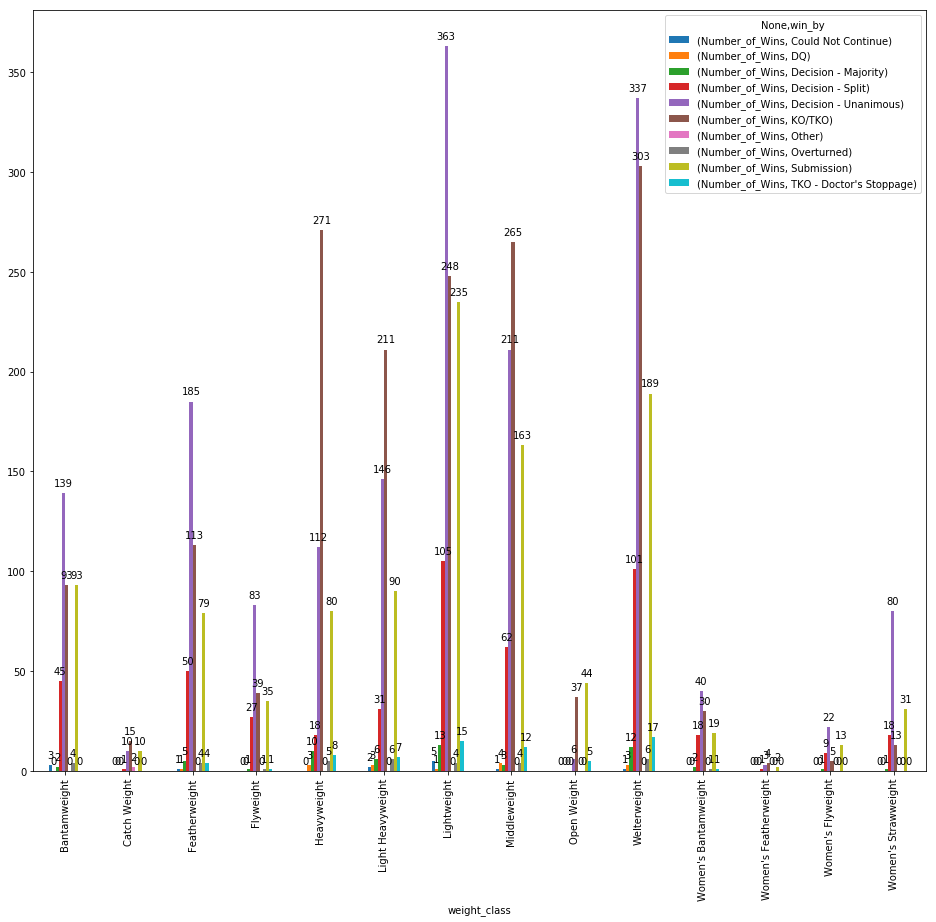

In [11]:
ax=pivot1_sorted.groupby(['weight_class','win_by']).sum().unstack().plot(kind='bar',figsize=(16,14))

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

#plt.show()

The question that was asked here was what was can we count something interesting? The above chart shows the different kinds of wins for each weight class and the amount of those wins. It's interesting to note that lightweight has the most of of decisions - unanimous. Welterweight had the most KO/TKOs surprisingly and then followed by Heavy weight. Lightweight had the most amount of submission wins and then followed by welter weight. If you were to judge skill by decisive wins suchs as KO/TKO and submssions it could be argued that welter weight could be the most skilled division. A question to ponder is why light weight has so many decision - unanimous, is the skillset so even that they're getting so many decision wins?

In [12]:
#print(df.shape)
#print(df_data.shape)
#print(df1a.shape)

In [13]:
weight_classes=pivot1.drop(columns=['win_by','Number_of_Wins'])
#weight_classes
weight_classes=weight_classes.drop_duplicates('weight_class',keep= 'last')
#weight_classes

In [14]:
#df1a.columns

In [15]:
#Pivot 2 will show the number of events by year

df2=df1a.drop_duplicates(['date','location_x'],keep= 'first')
df2
df2=df2.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee',
       'Fight_type', 'Winner','R_Sig_Str','B_Sig_Str'])
df2
df2['year']=[row.split('-')[2] for row in df2['date']]
df2
pivot2=df2.pivot_table(index='year',aggfunc='count')
#pivot2
pivot2=pivot2.drop(columns=['location_x','location_y','weight_class'])
#       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
#       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
#       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
#       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
#       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
#       'last_round_time', 'Format', 'Referee', 'date', 'location',
#       'Fight_type', 'Winner'])
pivot2.columns=['Number_Of_Events']
pivot2.head(5)

,Number_Of_Events
year,
1993,1
1994,3
1995,4
1996,5
1997,5


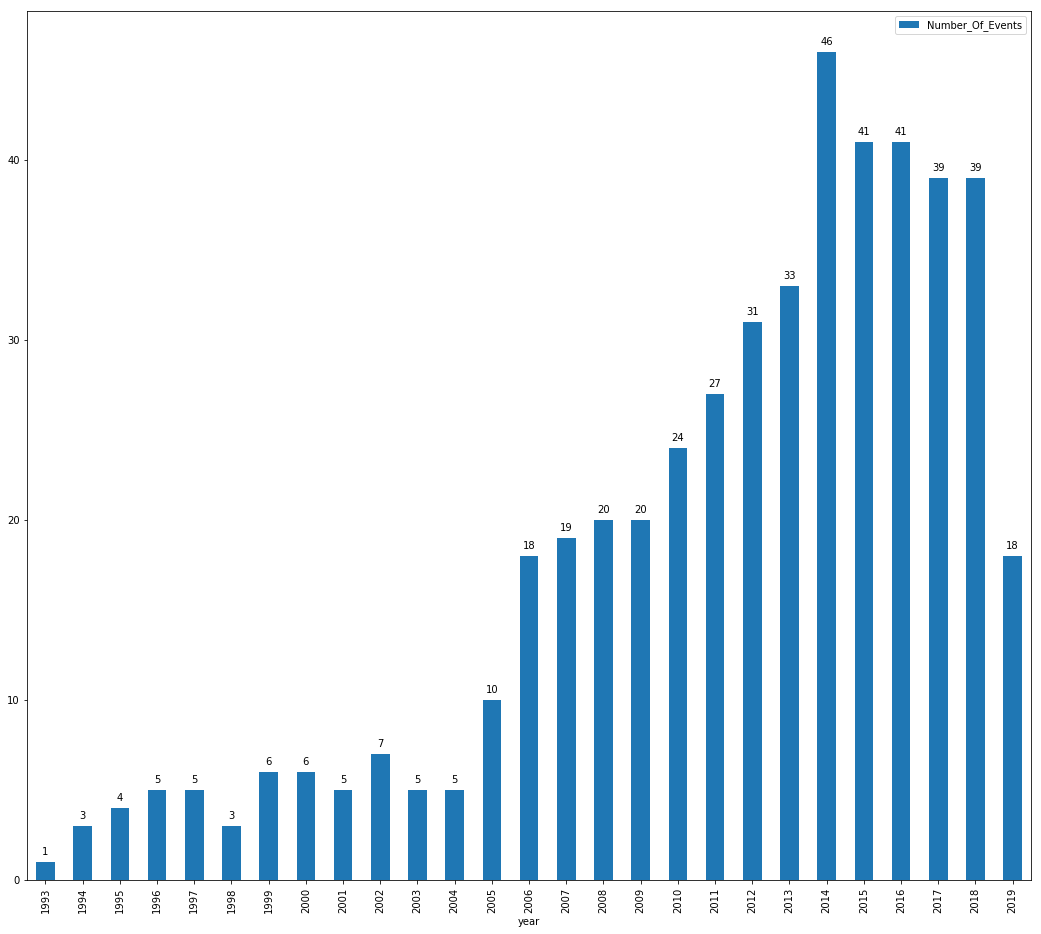

In [16]:
#This is a time series plot of the number of events by year

ax2=pivot2.plot(kind='bar',figsize=(18,16))
#for a,b in zip(pivot1['Fight_type'].values, pivot1['Number of Wins'].values):
# Call the function above. All the magic happens there.
add_value_labels(ax2)

The question here is if we can make a time series plot. This chart is to show the number of events over the years. 2014 had the most events and then the following years had a reduction in events. 2019 data is incomplete so that explains it's low event count. A question to ask is how much profit was generated each year for the events? Is there a profit per event metric that can be added to this chart to see if more events actually bring in more profit? 

In [17]:
#Pivot 3 will show the yearly weightclass win types and amount
df4=df1a
df4['year']=[row.split('-')[2] for row in df4['date']]
df4
pivot3=df4.pivot_table(index=['year','weight_class','win_by'],aggfunc='count')
pivot3=pivot3.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'last_round','Fight_type',
       'last_round_time', 'Format', 'Referee', 'Winner','R_Sig_Str','B_Sig_Str','location_x','location_y'])
pivot3.columns=['Number_of_Wins']
pivot3=pivot3.reset_index()
#pivot3.head(5)

In [18]:
#df1a.columns

In [19]:
#Pivot 4 shows the weight class, win type and at which round the win happened

df5=df1a
df5
pivot4=df5.pivot_table(index=['weight_class','win_by'],columns='last_round',aggfunc='count')
pivot4=pivot4.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND','Fight_type',
       'last_round_time', 'Format', 'Referee', 'Winner','R_Sig_Str','B_Sig_Str','location_x','year','location_y'])
pivot4.columns=['Number_of_Round_1_Wins','Number_of_Round_2_Wins','Number_of_Round_3_Wins','Number_of_Round_4_Wins','Number_of_Round_5_Wins']
pivot4=pivot4.fillna(0)
pivot4=pivot4.reset_index()
#pivot4.head(5)

In [20]:
#Pivot 4a shows the weight class win type and the round the win happened

pivot4a=df5.pivot_table(index='win_by',columns='last_round',aggfunc='count')
pivot4a=pivot4a.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND','Fight_type',
       'last_round_time', 'Format', 'Referee', 'Winner','R_Sig_Str','B_Sig_Str','location_x','year','location_y','weight_class'])
pivot4a.columns=['Number_of_Round_1_Wins','Number_of_Round_2_Wins','Number_of_Round_3_Wins','Number_of_Round_4_Wins','Number_of_Round_5_Wins']
pivot4a=pivot4a.fillna(0)
pivot4a=pivot4a.reset_index()
#pivot4a.head(5)

In [21]:
#Pivot 5 shows the weight class win type the round the win happened just for KO/TKO

#pivot5=pivot4.reset_index()
#print(pivot5.columns)
pivot5=pivot4.loc[pivot4['win_by']=='KO/TKO']
#us = df.loc[df['origin'] == 'US']
#pivot5.to_excel('pivot5.xlsx')
#pivot5.head(5)


In [22]:
pivot5a=pivot4a.loc[pivot4a['win_by']=='KO/TKO']
#us = df.loc[df['origin'] == 'US']
#pivot5.to_excel('pivot5.xlsx')
#pivot5a

In [23]:
df_test=df1a.loc[df1a['R_fighter']=='Tony Ferguson']
#df_test
df_test['R_Sig_Str2']=[int(row) for row in df_test['R_Sig_Str']]
#df_test
pivot_test=df_test.pivot_table(index='R_fighter',values='R_Sig_Str2',aggfunc='sum')
#pivot_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#df6 is the filtered df data of the KO/TKO wins that will allow for a histogram
df6=df1a
df6=df6.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND',
       'last_round_time', 'Format', 'Referee', 'Winner', 'date', 'location_x',
       'Fight_type', 'R_Sig_Str', 'B_Sig_Str', 'location_y'])
df6=df6.loc[df6['win_by']=='KO/TKO']
#df6.to_excel('df6.xlsx')
df6=df6.drop(columns='year') 
df6=df6.sort_values('weight_class',ascending=True)
#df6
df6.head(5)

,win_by,last_round,weight_class
0,KO/TKO,3,Bantamweight
1952,KO/TKO,2,Bantamweight
1971,KO/TKO,1,Bantamweight
511,KO/TKO,1,Bantamweight
490,KO/TKO,2,Bantamweight


In [69]:
#df6a is the filtered df data of the Submission wins that will allow for a histogram
df6a=df1a
df6a=df6a.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND',
       'last_round_time', 'Format', 'Referee', 'Winner', 'date', 'location_x',
       'Fight_type', 'R_Sig_Str', 'B_Sig_Str', 'location_y'])
df6a=df6a.loc[df6a['win_by']=='Submission']
#df6.to_excel('df6.xlsx')
df6a=df6a.drop(columns='year') 
df6a=df6a.sort_values('weight_class',ascending=True)
#df6
df6a.head(5)

,win_by,last_round,weight_class
1437,Submission,1,Bantamweight
2979,Submission,3,Bantamweight
3210,Submission,1,Bantamweight
2958,Submission,4,Bantamweight
2844,Submission,2,Bantamweight


In [73]:
#df6_test=df6.loc[df6['weight_class']=='Welterweight']
#df6_test=list(df6['last_round'])
#df6_test
x_var = 'weight_class'
groupby_var = 'last_round'
df_agg = df6.loc[:, [x_var, groupby_var]].groupby(groupby_var)
#list(df_agg)


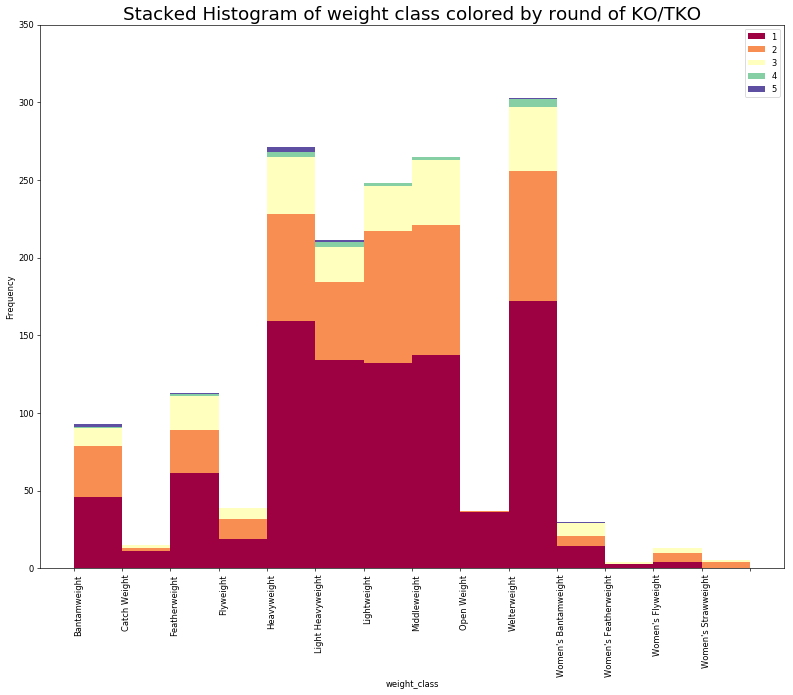

In [74]:
#Histogram of weight classes and the last round of the KO/TKO


# Prepare data
x_var = 'weight_class'
groupby_var = 'last_round'
df_agg = df6.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df6[x_var].values.tolist() for i, df6 in df_agg]

# Draw
plt.figure(figsize=(16,12), dpi= 60)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df6[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df6[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of weight class colored by round of KO/TKO", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 350)
plt.xticks(ticks=bins, labels=np.unique(df6[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()


The question here is if we can create a histogram. This histogram chart shows that when KO/TKOs happen, what round does it happen for each weight class. All weight classes except women's strawweight had the most amout of KO/TKOs in the first round. Welterweight had the most amount of KO/TKOs in the first round among all the weight classes surprisingly. Heavy Weight followed next with the most KO/TKOs in round one. KO/TKOs were definitely in the minority for the fifth round. Looking at the charts, if a KO/TKO will happen it will mostly happen in round one or two. Round three can still happen and the amount is lower than round two. Round four and five chances of a KO/TKO drop dramatically from the chart. One thing I could investigate is when KO/TKOs happen what's the probability or distribution for each round and for each weight class?

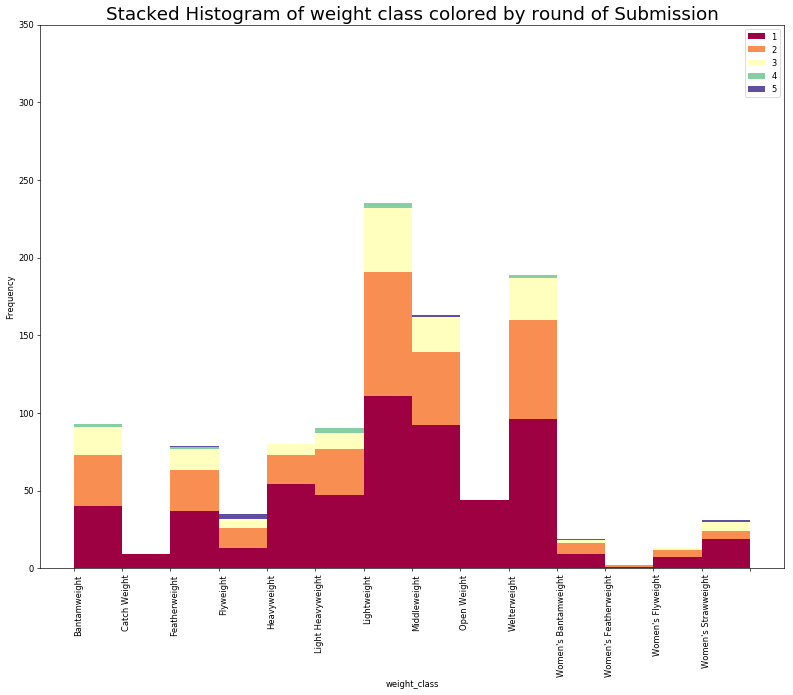

In [75]:
#Histogram of weight classes and the last round of the submission


# Prepare data
x_var = 'weight_class'
groupby_var = 'last_round'
df_agg = df6a.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df6a[x_var].values.tolist() for i, df6a in df_agg]

# Draw
plt.figure(figsize=(16,12), dpi= 60)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df6a[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df6a[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of weight class colored by round of Submission", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 350)
plt.xticks(ticks=bins, labels=np.unique(df6a[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

The majority of submissions happen in the first round for all weight classes. The second round drops off a little for all the weight classes. The third round has a larger drop off. The fourth round has a massive drop off and the fifth round has the largest drop off of them all. Light weight has the most submission followed by welter weight and the middle weight. The remaining weight classes except fly weight, open weight and catch weight all had similiar amount of submissions. A conclusion here is that welter weight appeared in the previous histogram and gives more data to show that this weight class is more talented with KOs and Submissions.

In [28]:
#Red fighter output of strikes
df1a
pivot6=df1a.pivot_table(index=['R_fighter','weight_class'],values='R_Sig_Str',aggfunc='sum')
pivot6
pivot6=pivot6.reset_index()
pivot6.columns
pivot6.head(5)
#pivot6=pivot6.loc[pivot6['R_fighter']=='Tony Ferguson']
#pivot6

,R_fighter,weight_class,R_Sig_Str
0,Aaron Phillips,Bantamweight,38
1,Aaron Riley,Lightweight,220
2,Aaron Rosa,Light Heavyweight,59
3,Aaron Simpson,Middleweight,233
4,Aaron Simpson,Welterweight,76


In [29]:
#Red fighter absorbtion of strikes
pivot7=df1a.pivot_table(index=['R_fighter','weight_class'],values='B_Sig_Str',aggfunc='sum')
pivot7
pivot7=pivot7.reset_index()
pivot7.columns
pivot7.head(5)

,R_fighter,weight_class,B_Sig_Str
0,Aaron Phillips,Bantamweight,63
1,Aaron Riley,Lightweight,189
2,Aaron Rosa,Light Heavyweight,19
3,Aaron Simpson,Middleweight,212
4,Aaron Simpson,Welterweight,39


In [30]:
#Blue fighter output of strikes
pivot8=df1a.pivot_table(index=['B_fighter','weight_class'],values='B_Sig_Str',aggfunc='sum')
pivot8
pivot8=pivot8.reset_index()
pivot8.columns
pivot8.head(5)

,B_fighter,weight_class,B_Sig_Str
0,Aaron Brink,Heavyweight,0
1,Aaron Phillips,Featherweight,18
2,Aaron Riley,Lightweight,30
3,Aaron Riley,Welterweight,64
4,Aaron Rosa,Heavyweight,73


In [31]:
#Blue fighter absorbtion of strikes
pivot9=df1a.pivot_table(index=['B_fighter','weight_class'],values='R_Sig_Str',aggfunc='sum')
pivot9
pivot9=pivot9.reset_index()
pivot9.columns
pivot9.head(5)

,B_fighter,weight_class,R_Sig_Str
0,Aaron Brink,Heavyweight,2
1,Aaron Phillips,Featherweight,37
2,Aaron Riley,Lightweight,95
3,Aaron Riley,Welterweight,89
4,Aaron Rosa,Heavyweight,88


In [32]:
#Total strikes ouput is pivot 6 and 8
pivot8.columns=['R_fighter','weight_class','R_Sig_Str']
pivot8
df_str_combined=pd.concat([pivot6, pivot8], axis=0,ignore_index=True)
df_str_combined
pivot10=df_str_combined.pivot_table(index=['R_fighter','weight_class'],aggfunc='sum')
pivot10=pivot10.reset_index()
pivot10.columns=['Fighter','weight_class','Sig_Str_Given']
pivot10['weight']=pivot10['weight_class'].apply(weight_function)
pivot10['gender']=pivot10['weight_class'].apply(gender_function)
pivot10=pivot10.loc[pivot10['gender']==1]
pivot10.head(5)


,Fighter,weight_class,Sig_Str_Given,weight,gender
0,Aaron Brink,Heavyweight,0,220,1
1,Aaron Phillips,Bantamweight,38,135,1
2,Aaron Phillips,Featherweight,18,145,1
3,Aaron Riley,Lightweight,250,155,1
4,Aaron Riley,Welterweight,64,170,1


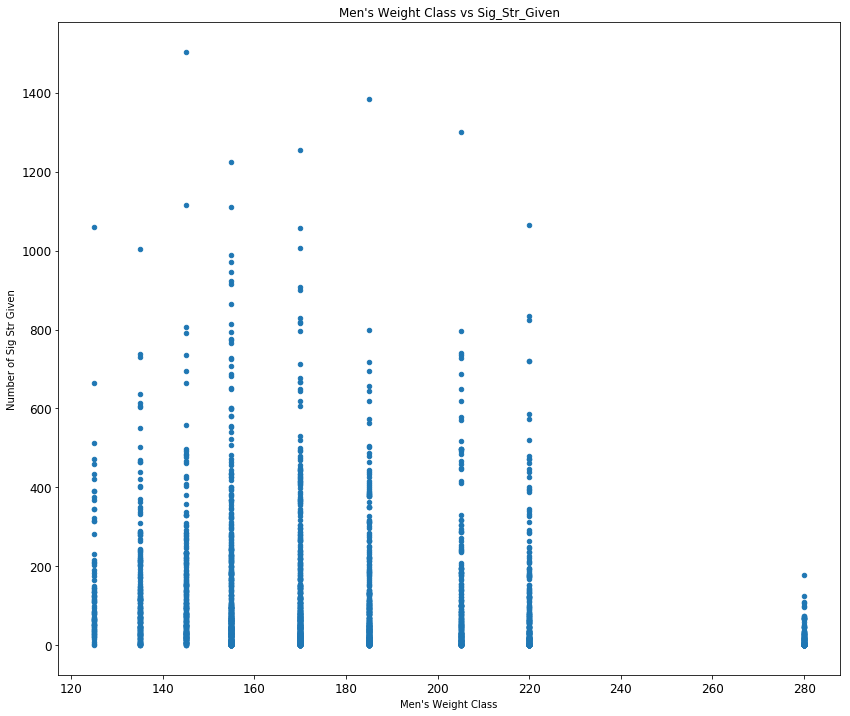

In [33]:
# Generate a scatter plot
pivot10.plot(kind='scatter', x='weight', y='Sig_Str_Given',figsize=(14,12))

# Add the title
plt.title("Men's Weight Class vs Sig_Str_Given")

# Add the x-axis label
plt.xlabel("Men's Weight Class")
plt.xticks(fontsize=12); plt.yticks(fontsize=12)

# Add the y-axis label
plt.ylabel('Number of Sig Str Given')

# Display the plot
plt.show()

This chart shows us the amount of significant strikes given to another oppenent for each of the men's weight class. Each weight class seemed to have an outlier that would deliver more significant strikes than the rest of the men in the weightclass. Some of the gaps in sig strikes was very large as seen in the 125,145,185 and 205 weight classes. The fighter that had the large gap was definitely way better in giving their significant strikes. A hypotheis is if there's a correlation between the top 5% of signicant strikers in each weight class and their KO rate or if they hold the title in the weight division.

In [34]:
#Total strikes taken is pivot 7 and 9
pivot9.columns=['R_fighter','weight_class','B_Sig_Str']
pivot9
df_str_combined=pd.concat([pivot7, pivot9], axis=0,ignore_index=True)
df_str_combined
pivot11=df_str_combined.pivot_table(index=['R_fighter','weight_class'],aggfunc='sum')
pivot11=pivot11.reset_index()
pivot11.columns=['Fighter','weight_class','Sig_Str_Taken']
pivot11['weight']=pivot11['weight_class'].apply(weight_function)
pivot11['gender']=pivot11['weight_class'].apply(gender_function)
pivot11=pivot11.loc[pivot11['gender']==1]
pivot11.head(5)

,Fighter,weight_class,Sig_Str_Taken,weight,gender
0,Aaron Brink,Heavyweight,2,220,1
1,Aaron Phillips,Bantamweight,63,135,1
2,Aaron Phillips,Featherweight,37,145,1
3,Aaron Riley,Lightweight,284,155,1
4,Aaron Riley,Welterweight,89,170,1


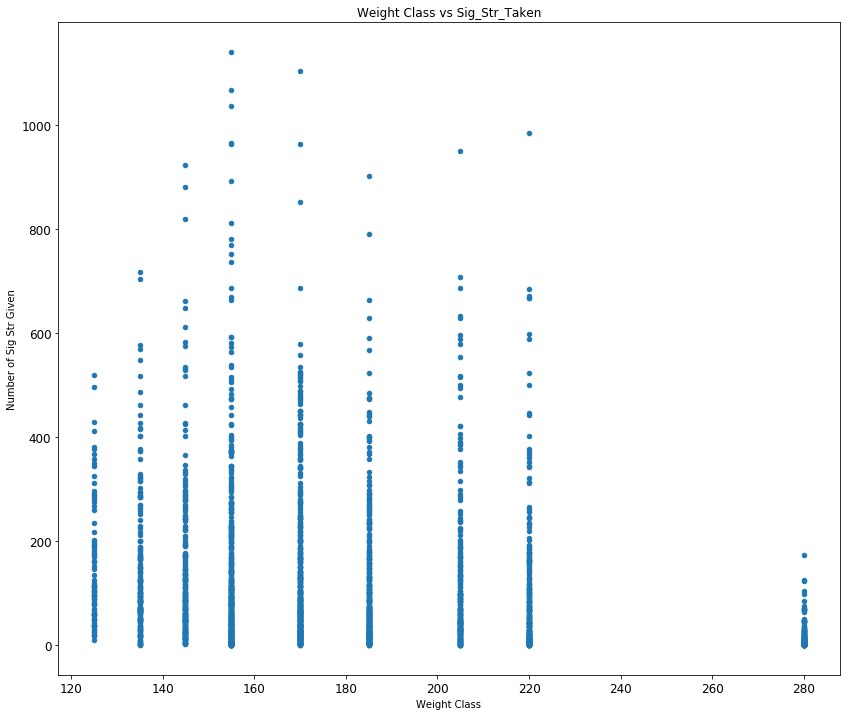

In [35]:
# Generate a scatter plot
pivot11.plot(kind='scatter', x='weight', y='Sig_Str_Taken',figsize=(14,12))

# Add the title
plt.title('Weight Class vs Sig_Str_Taken')

# Add the x-axis label
plt.xlabel('Weight Class')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)

# Add the y-axis label
plt.ylabel('Number of Sig Str Given')

# Display the plot
plt.show()

This chart really shows which weight class receives the most significant strikes. In other words the weight class that receives the most punishment. 155 (Light weight class) seemed the most consistent in the receiving end as the scatter plot is very stable. 170,205 and 205+(HW) weight classes had more outliers in plots that recieved a significant amount of strikes. Those fighters that were the outliers could work on their defense to improve their skill or otherwise suffer mental damage. Another question to ask is how is this trending over time? Are any weight classes recieving more damage over time or actually less? Depending on the trend this could tell us how the defense skill is for each weight class is doing over time.

In [36]:
#df1a.columns

In [78]:
pivot12=df1a.pivot_table(index=['year','weight_class','win_by'],aggfunc='count')
pivot12=pivot12.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'last_round',
       'last_round_time', 'Format', 'Referee', 'location_x',
       'Fight_type', 'Winner', 'R_Sig_Str', 'B_Sig_Str', 'location_y'])
pivot12.columns=['Number_of_Wins']
pivot12=pivot12.reset_index()
#pivot12.head(5)

In [38]:
win_types=pivot1.drop(columns=['weight_class','Number_of_Wins','weight','gender'])
#win_types
win_types=win_types.drop_duplicates('win_by',keep= 'last')
#win_types

In [76]:
win_other=pivot12.loc[pivot12['win_by']=='Other']
win_other

win_CNC=pivot12.loc[pivot12['win_by']=='Could Not Continue']
win_CNC

win_DQ=pivot12.loc[pivot12['win_by']=='DQ']
win_DQ

win_overturn=pivot12[pivot12.win_by=='Overturned']
win_overturn

win_TKODR=pivot12[pivot12.win_by=="TKO - Doctor's Stoppage"]
win_TKODR

win_DecMaj=pivot12[pivot12.win_by=="Decision - Majority"]
win_DecMaj

win_DecSplit=pivot12[pivot12.win_by=="Decision - Split"]
win_DecSplit

win_DecUna=pivot12[pivot12.win_by=="Decision - Unanimous"]
win_DecUna

win_KOTKO=pivot12[pivot12.win_by=="KO/TKO"]
win_KOTKO

win_Sub=pivot12[pivot12.win_by=="Submission"]
#win_Sub

In [79]:
pivot13=df1a.pivot_table(index=['year','win_by'],aggfunc='count')
#print(pivot1.info())
#print(df_data.dtypes)

pivot13=pivot13.drop(columns=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'last_round',
       'last_round_time', 'Format', 'Referee', 'location_x',
       'Fight_type', 'Winner', 'R_Sig_Str', 'B_Sig_Str', 'location_y','weight_class'])

#pivot13=pivot13.drop(columns=['Fight_type'])
pivot13.columns=['Number_of_Wins']
pivot13=pivot13.reset_index()
#pivot13.head(5)

In [77]:
win_other2=pivot13.loc[pivot13['win_by']=='Other']
win_other2

win_CNC2=pivot13.loc[pivot13['win_by']=='Could Not Continue']
win_CNC2

win_DQ2=pivot13.loc[pivot13['win_by']=='DQ']
win_DQ2

win_overturn2=pivot13[pivot13.win_by=='Overturned']
win_overturn2

win_TKODR2=pivot13[pivot13.win_by=="TKO - Doctor's Stoppage"]
win_TKODR2

win_DecMaj2=pivot13[pivot13.win_by=="Decision - Majority"]
win_DecMaj2

win_DecSplit2=pivot13[pivot12.win_by=="Decision - Split"]
win_DecSplit2

win_DecUna2=pivot13[pivot13.win_by=="Decision - Unanimous"]
win_DecUna2

win_KOTKO2=pivot13[pivot13.win_by=="KO/TKO"]
win_KOTKO2

win_Sub2=pivot13[pivot13.win_by=="Submission"]
#win_Sub2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
